# Flight fare prediction

* importing all needed packages

1. Import Data 
2. EDA
3. Feature Engineering
4. Model Building
5. Model Evaluation
6. HyperParameter Tuning
7. Conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score

## 1. import data

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Axes: xlabel='Price', ylabel='Count'>

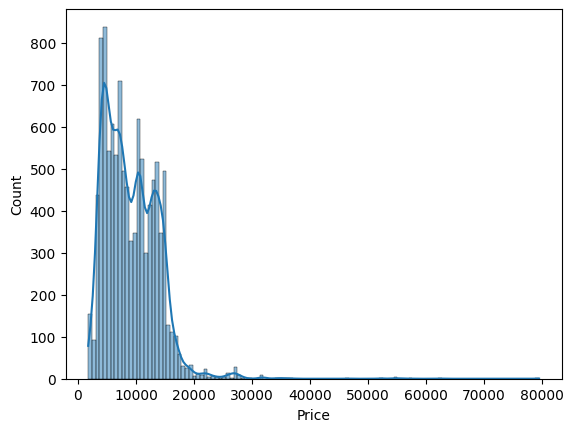

In [6]:
sns.histplot(df.Price,kde=True)

<Axes: >

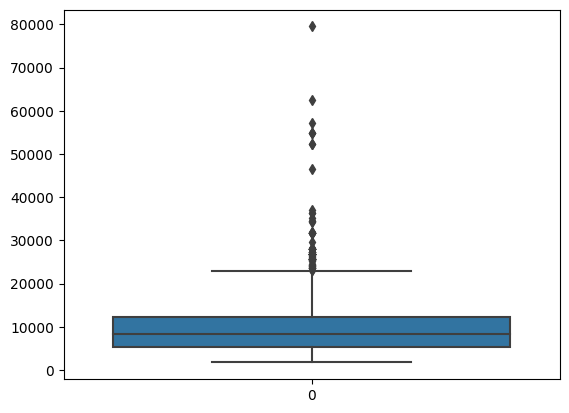

In [7]:
sns.boxplot(df.Price)

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


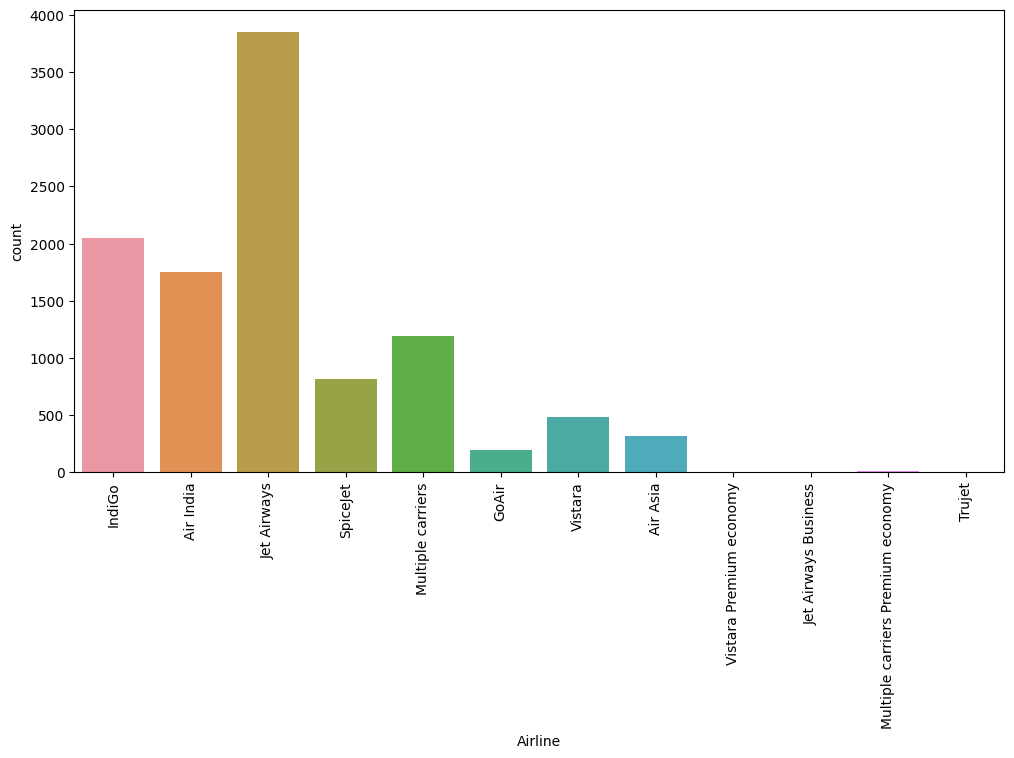

In [9]:
fig = plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(x=df.Airline,)
plt.show()

/var/folders/nr/cb3w_fds1kj36f9k8qgfhqp40000gn/T/ipykernel_14731/3481462058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Airline']).mean().plot(kind='bar',color='orange')


<Axes: xlabel='Airline'>

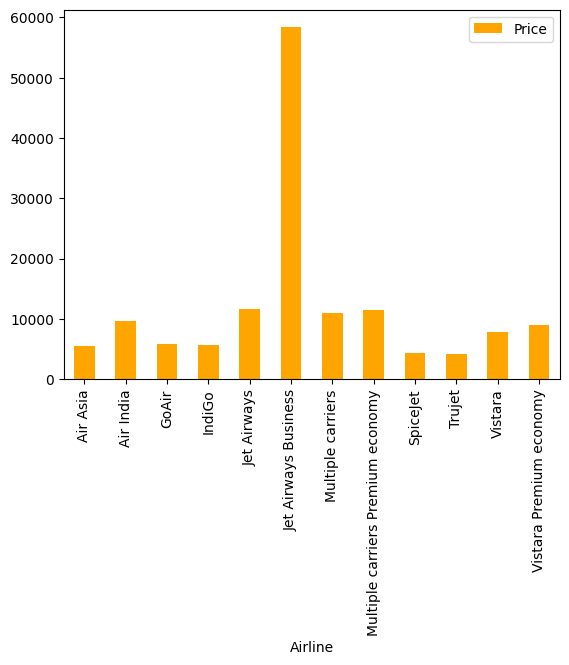

In [10]:
df.groupby(['Airline']).mean().plot(kind='bar',color='orange')

Jet Airways Business make sense for the outliers

/var/folders/nr/cb3w_fds1kj36f9k8qgfhqp40000gn/T/ipykernel_14731/1071107310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Airline'] != 'Jet Airways Business'].groupby(['Airline']).mean().plot(kind='bar',color='green')


<Axes: xlabel='Airline'>

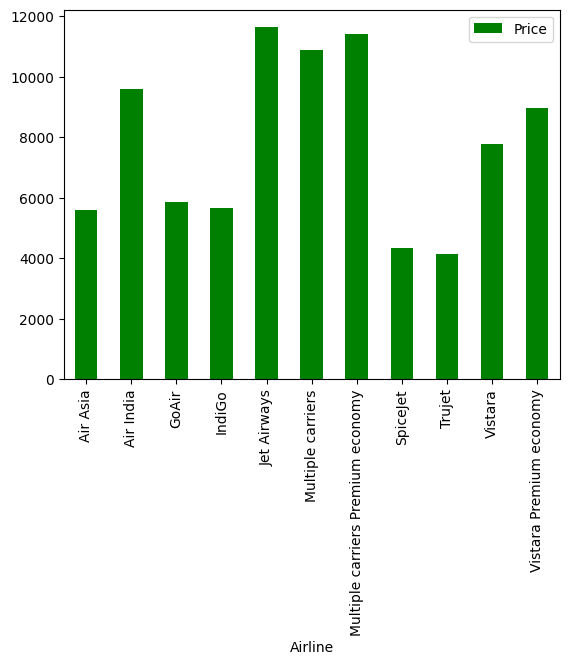

In [11]:
df[df['Airline'] != 'Jet Airways Business'].groupby(['Airline']).mean().plot(kind='bar',color='green')

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


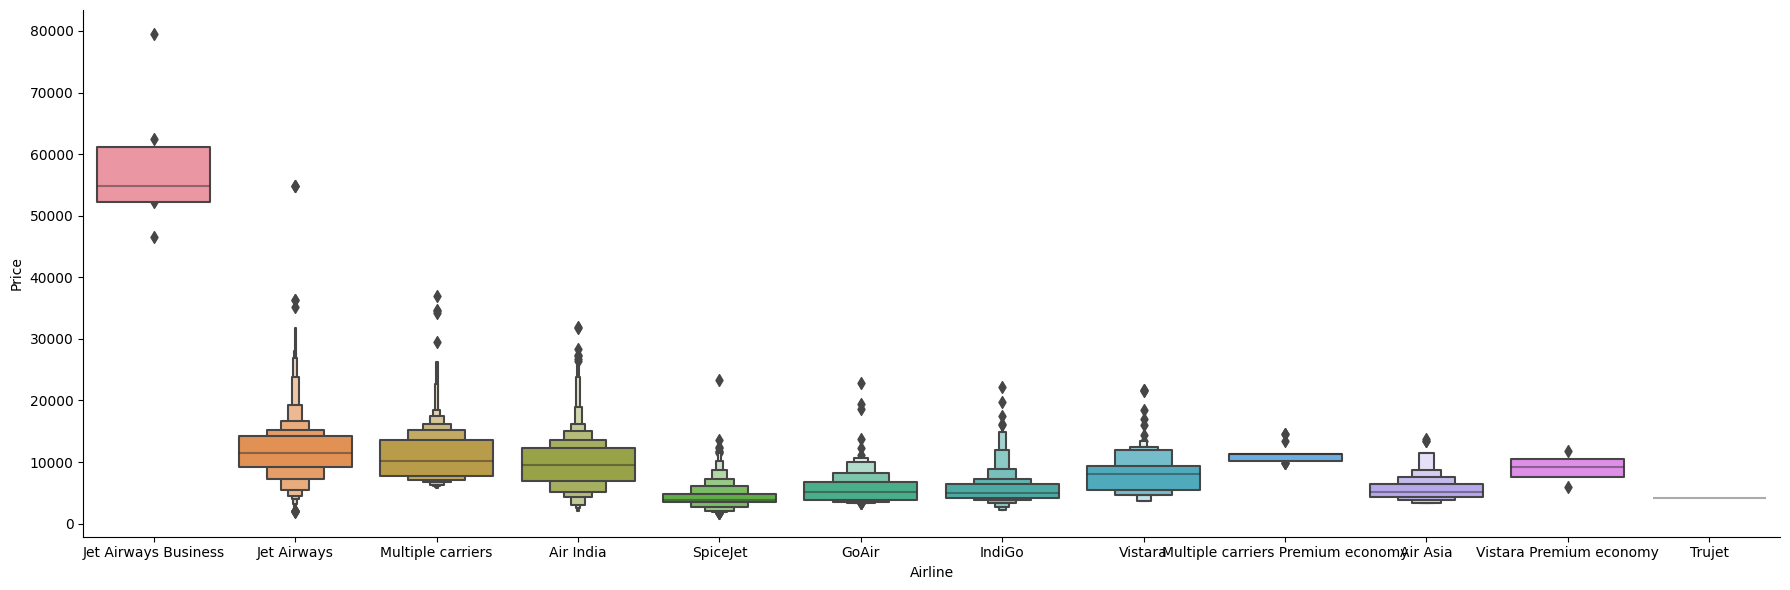

In [13]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)


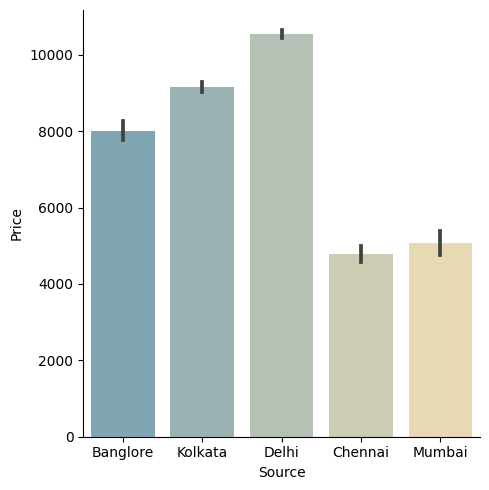

In [14]:
sns.catplot(y="Price",x="Source",data = df,kind="bar",palette="blend:#7AB,#EDA")

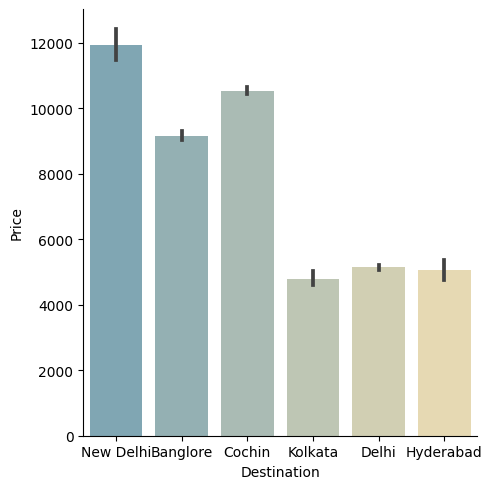

In [15]:
sns.catplot(y="Price",x="Destination",data = df,kind="bar",palette="blend:#7AB,#EDA")

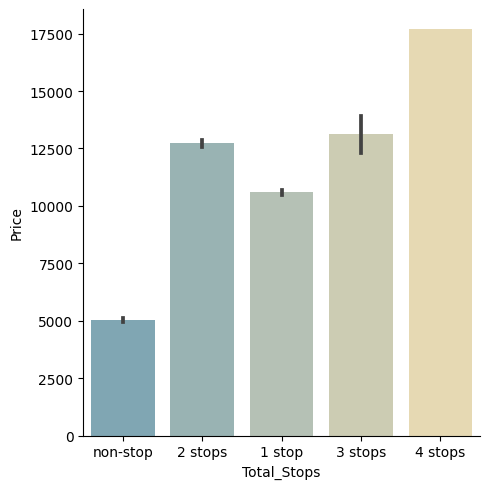

In [16]:
sns.catplot(y="Price",x="Total_Stops",data = df,kind="bar",palette="blend:#7AB,#EDA")

<Axes: xlabel='Total_Stops', ylabel='count'>

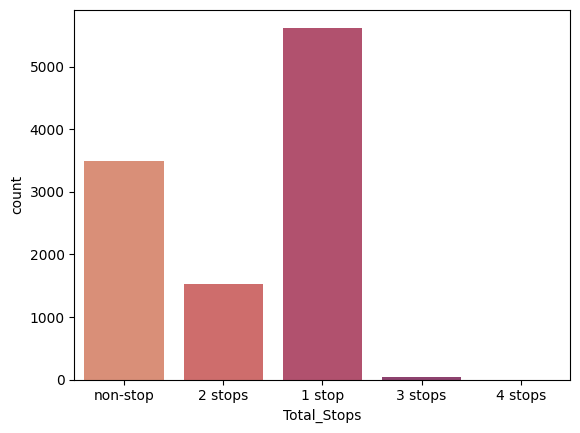

In [17]:
sns.countplot(x = df.Total_Stops,palette="flare")

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<Figure size 1200x600 with 0 Axes>

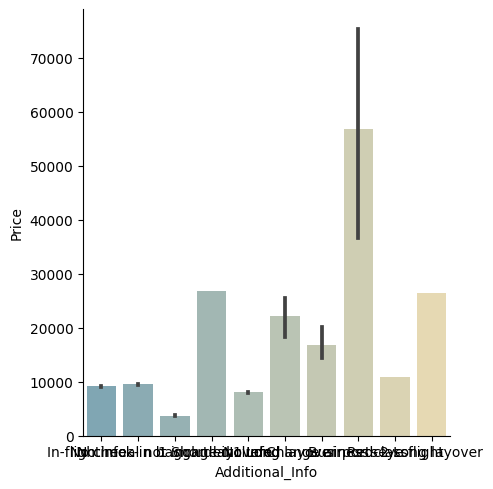

In [19]:
plt.figure(figsize=(12,6))
sns.catplot(y="Price",x="Additional_Info",data = df,kind="bar",palette="blend:#7AB,#EDA")
plt.show()


## 3. feature engineering

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


handle date and time

In [21]:
df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month



In [22]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [23]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute


In [24]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [25]:
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [26]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [27]:
dur_hour=[]
dur_min=[]
for i in df.Duration:
    if 'h'in i and 'm' in i:
        dur_hour.append(int(i.split('h')[0]))
        dur_min.append(int(i.split('h')[1][:-1]))
    elif 'h' in i:
        dur_hour.append(int(i.split('h')[0]))
        dur_min.append(int(0))
        
    else:
        dur_hour.append(int(0))
        dur_min.append(int(i[:-1]))
        
        

In [28]:
df['Duration_hour'] = dur_hour
df['Duration_min'] = dur_min

In [29]:
 df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [30]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [31]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [32]:
df['Source'] = df.Source.apply(lambda x: "Source_" + x)
df['Destination'] = df.Destination.apply(lambda x: "Destination_" + x)

<Axes: xlabel='Dep_hour', ylabel='Price'>

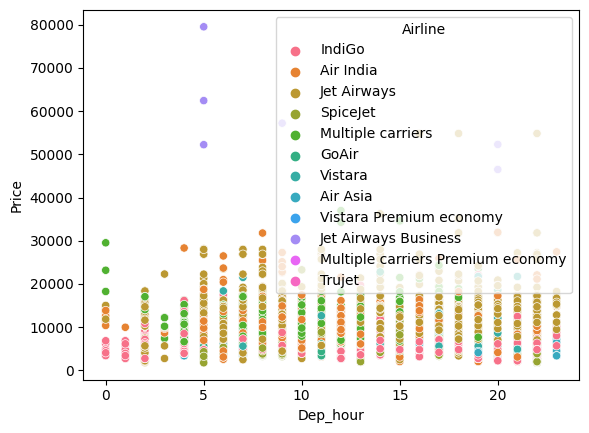

In [33]:
sns.scatterplot(x=df.Dep_hour,y=df.Price,hue=df.Airline)

/var/folders/nr/cb3w_fds1kj36f9k8qgfhqp40000gn/T/ipykernel_14731/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

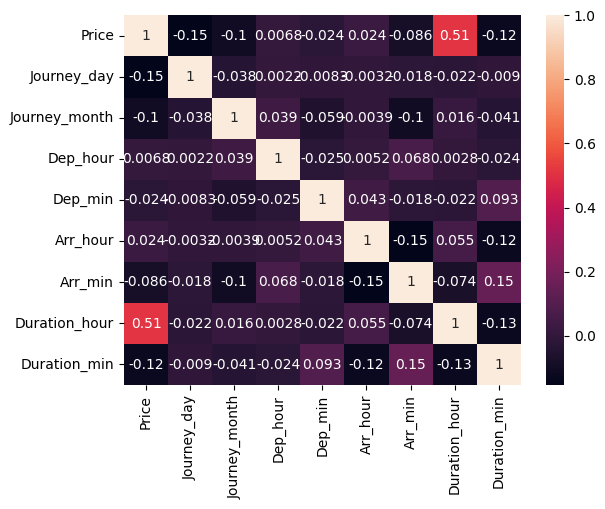

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Source_Banglore,Destination_New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Source_Kolkata,Destination_Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Source_Delhi,Destination_Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Source_Kolkata,Destination_Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Source_Banglore,Destination_New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Source_Kolkata,Destination_Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Source_Kolkata,Destination_Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Source_Banglore,Destination_Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Source_Banglore,Destination_New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [36]:
df['Total_Stops'] = df.Total_Stops.replace({"non-stop":0,"1 stop" : 1,"2 stops":2,"3 stops":3,"4 stops":4})

In [37]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Source_Banglore,Destination_New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Source_Kolkata,Destination_Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Source_Delhi,Destination_Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Source_Kolkata,Destination_Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Source_Banglore,Destination_New Delhi,1.0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Source_Kolkata,Destination_Banglore,0.0,4107,9,4,19,55,22,25,2,30
10679,Air India,Source_Kolkata,Destination_Banglore,0.0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Source_Banglore,Destination_Delhi,0.0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Source_Banglore,Destination_New Delhi,0.0,12648,1,3,11,30,14,10,2,40


In [38]:
df.Total_Stops.unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [39]:
df.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      1
Price            0
Journey_day      0
Journey_month    0
Dep_hour         0
Dep_min          0
Arr_hour         0
Arr_min          0
Duration_hour    0
Duration_min     0
dtype: int64

In [40]:
df['Total_Stops'] = df.Total_Stops.fillna(df.Total_Stops.median())

In [41]:
df['Total_Stops'] = df.Total_Stops.apply(lambda x: int(x))

In [42]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
0,IndiGo,Source_Banglore,Destination_New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Source_Kolkata,Destination_Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Source_Delhi,Destination_Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Source_Kolkata,Destination_Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Source_Banglore,Destination_New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Source_Kolkata,Destination_Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Source_Kolkata,Destination_Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Source_Banglore,Destination_Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Source_Banglore,Destination_New Delhi,0,12648,1,3,11,30,14,10,2,40


In [43]:
df = pd.concat([df,pd.get_dummies(df.Airline,drop_first=True)],axis=1)

In [44]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Source_Banglore,Destination_New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Source_Kolkata,Destination_Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Source_Delhi,Destination_Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Source_Kolkata,Destination_Banglore,1,6218,12,5,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Source_Banglore,Destination_New Delhi,1,13302,1,3,16,50,21,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Source_Kolkata,Destination_Banglore,0,4107,9,4,19,55,22,...,0,0,0,0,0,0,0,0,0,0
10679,Air India,Source_Kolkata,Destination_Banglore,0,4145,27,4,20,45,23,...,0,0,0,0,0,0,0,0,0,0
10680,Jet Airways,Source_Banglore,Destination_Delhi,0,7229,27,4,8,20,11,...,0,0,1,0,0,0,0,0,0,0
10681,Vistara,Source_Banglore,Destination_New Delhi,0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,1,0


In [45]:
df = pd.concat([df,pd.get_dummies(df.Source,drop_first=True)],axis=1)

In [46]:
df = pd.concat([df,pd.get_dummies(df.Destination,drop_first=True)],axis=1)

In [47]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Source_Banglore,Destination_New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Source_Kolkata,Destination_Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Source_Delhi,Destination_Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Source_Kolkata,Destination_Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Source_Banglore,Destination_New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Source_Kolkata,Destination_Banglore,0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Source_Kolkata,Destination_Banglore,0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Source_Banglore,Destination_Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Source_Banglore,Destination_New Delhi,0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [49]:
df

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

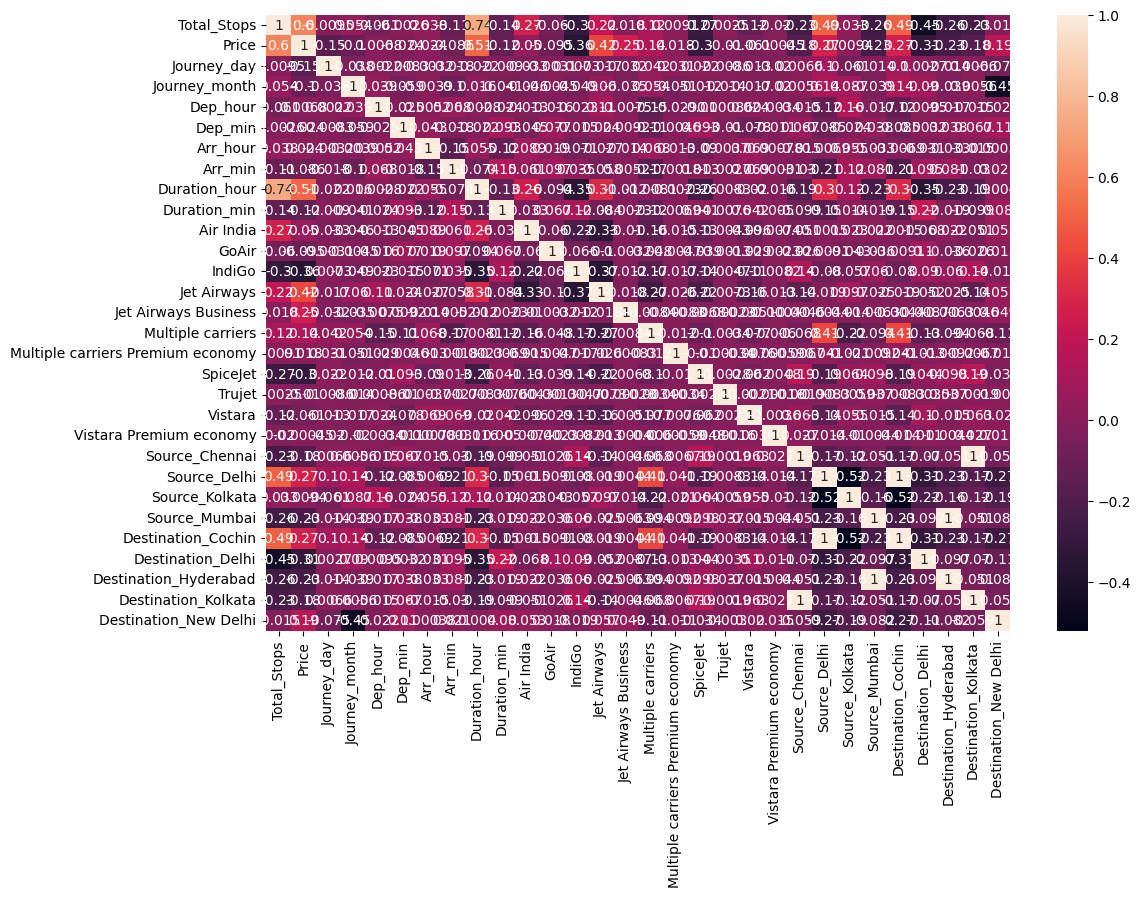

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [51]:
X,y = df.drop(['Price'],axis=1), df['Price']

In [52]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [54]:
sc = StandardScaler()

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
X_train = sc.fit_transform(X_train)

In [57]:
X_test = sc.transform(X_test)

## 5. model building

In [58]:
models = {
    "random_forests" : RandomForestRegressor(),
    "decision_tree" : DecisionTreeRegressor(),
    "gradient_boosting" : GradientBoostingRegressor(),
    "svr" : SVR(),
    "KNN" : KNeighborsRegressor()
}

In [59]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse, r2_square

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # train model

    # make predictions

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate train and test dataset

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

        

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2855.9886
- Mean Absolute Error: 1965.8702
- R2 Score: 0.6244
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2775.7053
- Mean Absolute Error: 1952.3873
- R2 Score: 0.6186


Lasso
Model performance for Training set
- Root Mean Squared Error: 2855.2789
- Mean Absolute Error: 1961.8967
- R2 Score: 0.6246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2773.6160
- Mean Absolute Error: 1948.0772
- R2 Score: 0.6191


Ridge
Model performance for Training set
- Root Mean Squared Error: 2855.2548
- Mean Absolute Error: 1962.3240
- R2 Score: 0.6246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2773.8528
- Mean Absolute Error: 1948.9489
- R2 Score: 0.6191


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1892.3717
- Mean Absolute Error: 1133.7299


we will select Xgboost and hyperparameter tune it

In [61]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
params = {
    'model__n_estimators': [100, 50, 80],
    'model__max_depth': [3, 2, 1],
    'model__learning_rate': [0.05, 0.01, 0.20],
    }

In [63]:
gs = RandomizedSearchCV(XGBRegressor(),param_distributions=params,verbose=True,n_jobs=-1)

In [64]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[10:10:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators" } are not used.



RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.05, 0.01,
                                                                 0.2],
                                        'model__max_depth': [3, 2, 1],
                                        'model__n_estimators': [100, 50, 80]},
                   verbose=True)

In [65]:
pre = gs.predict(X_test)

In [66]:
r2_score(y_test,pre)

0.8403348733822005

In [71]:
p1 = xg.predict(X_test)

In [72]:
r2_score(y_test,p1)

0.8403348733822005

In [77]:
import pickle

In [84]:
with open('model.pickle','wb') as fl:
    pickle.dump(gs,fl)

In [90]:
with open('model.pickle','rb') as rf:
    g = pickle.load(rf)

In [92]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
df

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [96]:
test_file = pd.read_excel('Test_set.xlsx')

In [97]:
test_file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [98]:
data = test_file.iloc[1]

In [105]:
data = pd.DataFrame(data).T

In [228]:
def process(df):
    df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
    df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

    df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
    df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

    df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
    df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

    dur_hour=[]
    dur_min=[]
    for i in df.Duration:
        if 'h'in i and 'm' in i:
            dur_hour.append(int(i.split('h')[0]))
            dur_min.append(int(i.split('h')[1][:-1]))
        elif 'h' in i:
            dur_hour.append(int(i.split('h')[0]))
            dur_min.append(int(0))

        else:
            dur_hour.append(int(0))
            dur_min.append(int(i[:-1]))


    df['Duration_hour'] = dur_hour
    df['Duration_min'] = dur_min

    df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

    df['Source'] = df.Source.apply(lambda x: "Source_" + x)
    df['Destination'] = df.Destination.apply(lambda x: "Destination_" + x)


    df['Total_Stops'] = df.Total_Stops.replace({"non-stop":0,"1 stop" : 1,"2 stops":2,"3 stops":3,"4 stops":4})

    df['Total_Stops'] = df.Total_Stops.fillna(df.Total_Stops.median())

    df['Total_Stops'] = df.Total_Stops.apply(lambda x: int(x))

    df = pd.concat([df,pd.get_dummies(df.Airline,drop_first=True)],axis=1)

    df = pd.concat([df,pd.get_dummies(df.Source,drop_first=True)],axis=1)

    df = pd.concat([df,pd.get_dummies(df.Destination,drop_first=True)],axis=1)



    fd = pd.read_csv('test_samp.csv')

    for i in fd.columns:
        df[i] = 0
        
    df.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)


    return df

In [229]:
ndf = pd.read_excel('Data_Train.xlsx')

In [230]:
data = ndf.iloc[1]

In [232]:
price = data.Price

In [239]:
data.drop(['Price'],inplace=True)

/var/folders/nr/cb3w_fds1kj36f9k8qgfhqp40000gn/T/ipykernel_14731/4046760633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Price'],inplace=True)


In [244]:
fd = process(pd.DataFrame(data).T)

In [246]:
p = sc.transform(fd)

In [247]:
gs.predict(p)

array([7286.765], dtype=float32)

In [248]:
price

7662

In [249]:
with open('scaler.pickle','wb') as file:
    pickle.dump(sc,file)